In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
%matplotlib inline

In [19]:
df = pd.read_csv('P6_P7_spam.csv',encoding = 'latin-1')

In [20]:
df.shape

(5572, 5)

In [21]:
df.info()
df=df.dropna(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
df.columns = ['label','message']
df = df[['message','label']]

In [23]:
df['length']=df['message'].apply(len)
df.head()

,message,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61


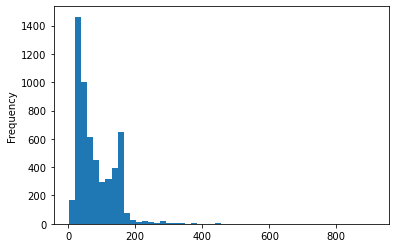

In [24]:
df['length'].plot(bins=50,kind='hist')

In [25]:
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [26]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [28]:
msg_train,msg_test,label_train,label_test = train_test_split(df['message'],df['label'],test_size=0.2)
bow_transformer = CountVectorizer(analyzer=text_process).fit(msg_train)
print(bow_transformer.vocabulary_)

{'uncles': 9355, 'Atlanta': 937, 'Wish': 3734, 'guys': 6055, 'great': 6018, 'semester': 8397, 'Hahahause': 1857, 'brain': 4445, 'dear': 5106, 'actually': 3894, 'sleeping': 8572, 'still': 8809, 'might': 7087, 'u': 9341, 'call': 4554, 'back': 4224, 'text': 9063, 'gr8': 6001, 'rock': 8227, 'sis': 8545, 'send': 8401, 'wen': 9625, 'wake': 9534, 'somewhere': 8656, 'Fredericksburg': 1657, 'Tone': 3466, 'Club': 1269, 'subs': 8875, 'expired': 5565, '2': 372, 'resub': 8178, 'reply': 8137, 'MONOC': 2347, '4': 520, 'monos': 7169, 'POLYC': 2710, 'polys': 7764, '1': 256, 'weekly': 9608, '150p': 314, 'per': 7648, 'week': 9604, 'Txt': 3505, 'STOP': 3048, 'stop': 8820, 'msg': 7205, 'free': 5806, 'Stream': 3259, '0871212025016': 94, 'Depends': 1406, 'going': 5970, 'lor': 6854, 'Ok': 2633, 'found': 5795, 'dis': 5239, 'pierre': 7701, 'cardin': 4606, 'one': 7468, 'looks': 6851, 'normal': 7367, 'costs': 4959, '20': 373, 'sale': 8287, 'Hello': 1889, 'request': 8144, 'ltgt': 6900, 'Rs5': 2965, 'transfered': 9

In [29]:
messages_bow = bow_transformer.transform(msg_train)

In [30]:
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4457, 9978)


In [31]:
messages_bow1 = bow_transformer.transform(msg_test)
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf1=tfidf_transformer.transform(messages_bow1)

In [33]:
model1 = LinearSVC()
model1.fit(messages_tfidf,label_train)
result1 = model1.predict(messages_tfidf1)
print(classification_report(label_test,result1))
print(confusion_matrix(label_test,result1))
accuracy_score(label_test,result1)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       975
        spam       0.99      0.93      0.96       140

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

[[974   1]
 [ 10 130]]


0.9901345291479821

In [34]:
model2 = SVC()
model2.fit(messages_tfidf,label_train)
result2 = model2.predict(messages_tfidf1)
print(classification_report(label_test,result2))
print(confusion_matrix(label_test,result2))
accuracy_score(label_test,result2)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       975
        spam       1.00      0.88      0.94       140

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.98      0.98      1115

[[975   0]
 [ 17 123]]


0.9847533632286996